# Week 4 Assignment
### choose features and observations, make some statistics and calculations for understanding dataset
### visualize and interpret dataset futures

In [150]:
# import necessary modules
import pandas as pd
import numpy as np

In [151]:
# load NASA Global Martian Crater Database into `nasa_df` dataframe
nasa_df = pd.read_csv('marscrater_pds.csv')

# print head of `nasa_df` 
nasa_df.head()

,CRATER_ID,CRATER_NAME,LATITUDE_CIRCLE_IMAGE,LONGITUDE_CIRCLE_IMAGE,DIAM_CIRCLE_IMAGE,DEPTH_RIMFLOOR_TOPOG,MORPHOLOGY_EJECTA_1,MORPHOLOGY_EJECTA_2,MORPHOLOGY_EJECTA_3,NUMBER_LAYERS
0,01-000000,,84.367,108.746,82.10,0.22,,,,0
1,01-000001,Korolev,72.760,164.464,82.02,1.97,Rd/MLERS,HuBL,,3
2,01-000002,,69.244,-27.240,79.63,0.09,,,,0
3,01-000003,,70.107,160.575,74.81,0.13,,,,0
4,01-000004,,77.996,95.617,73.53,0.11,,,,0


In [152]:
# repair broken label `CRATER_ID` in the original dataset
cols = list(nasa_df.columns)
cols[0] = 'CRATER_ID'
nasa_df.columns = cols

### Step 1. Extract fields from original dataset  which need for our resarch:
- CRATER_ID
- LATITUDE_CIRCLE_IMAGE
- LONGITUDE_CIRCLE_IMAGE
- DIAM_CIRCLE_IMAGE
- DEPTH_RIMFLOOR_TOPOG

In [153]:
# create new dataframe `data` from `nasa_df`
data = nasa_df[['CRATER_ID', 'LATITUDE_CIRCLE_IMAGE', 'LONGITUDE_CIRCLE_IMAGE', 
         'DIAM_CIRCLE_IMAGE', 'DEPTH_RIMFLOOR_TOPOG']]
data.head()

,CRATER_ID,LATITUDE_CIRCLE_IMAGE,LONGITUDE_CIRCLE_IMAGE,DIAM_CIRCLE_IMAGE,DEPTH_RIMFLOOR_TOPOG
0,01-000000,84.367,108.746,82.10,0.22
1,01-000001,72.760,164.464,82.02,1.97
2,01-000002,69.244,-27.240,79.63,0.09
3,01-000003,70.107,160.575,74.81,0.13
4,01-000004,77.996,95.617,73.53,0.11


In [154]:
# check for positive diameter and depth
print ('QTY of bad diameters = ',data[data['DIAM_CIRCLE_IMAGE'] <= 0]['DIAM_CIRCLE_IMAGE'].count())
print ('QTY of bad depth = ',data[data['DEPTH_RIMFLOOR_TOPOG'] <= 0]['DEPTH_RIMFLOOR_TOPOG'].count())

QTY of bad diameters =  0
QTY of bad depth =  307539


#### We see too many `'bad'` magnitudes of the crater depth. Let's look at this column more carefully


In [155]:
# count negative depth
print ('QTY of negstive depth = ',data[data['DEPTH_RIMFLOOR_TOPOG'] < 0]['DEPTH_RIMFLOOR_TOPOG'].count())

# count zero-value depth
print ('QTY of negative depth = ',data[data['DEPTH_RIMFLOOR_TOPOG'] == 0]['DEPTH_RIMFLOOR_TOPOG'].count())

QTY of negstive depth =  10
QTY of negative depth =  307529


#### Craters with negative & zero depth are hills or undefined and we have to exclude this observations from research

In [156]:
# store indexes of raw with negative  and zero depth
negative_zero_indexes = list(data[data['DEPTH_RIMFLOOR_TOPOG'] <= 0 ].index)

# remove this raw from `data`
data = data.drop(negative_zero_indexes)

print ('QTY of zero/negative depth = {}'.format(data[data['DEPTH_RIMFLOOR_TOPOG'] <= 0]['DEPTH_RIMFLOOR_TOPOG'].count()))

QTY of zero/negative depth = 0


#### Quantiles below show  that  90% of craters belong to `not extra large` craters which conform `Newton’s approximation for the impact depth` (  [see CodeBook](https://github.com/sergei8/Project/blob/master/mars-craters/Mars_Surface_Study.pdf) ) .

In [157]:
# remove all raws with diameter > 50km (extra large meteors/craters)
data = data.drop(data[data.DIAM_CIRCLE_IMAGE > 50].index)

#### Make a new future: Depth / Diameter which we will use for analyse.

In [158]:
data['DEPTH_DIAM_RATIO'] = data['DEPTH_RIMFLOOR_TOPOG'] / data['DIAM_CIRCLE_IMAGE']
data[['CRATER_ID','DEPTH_DIAM_RATIO']].head()

,CRATER_ID,DEPTH_DIAM_RATIO
13,01-000013,0.003214
14,01-000014,0.002832
15,01-000015,0.021704
16,01-000016,0.001858
17,01-000017,0.000847


## Visualize and exploratory analyse of the dataset

In [159]:
import matplotlib.pylab as plt
%matplotlib inline

### Univariable graphs

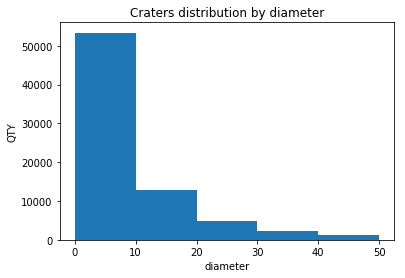

In [160]:
bins = [0, 10, 20, 30, 40, 50]
plt.hist(data['DIAM_CIRCLE_IMAGE'],bins)

plt.xlabel('diameter')
plt.ylabel('QTY')
plt.title('Craters distribution by diameter')

plt.show()

groups = data.DIAM_CIRCLE_IMAGE.groupby(pd.cut(data.DIAM_CIRCLE_IMAGE, bins), sort=True)

#### Graph shows strong right skew

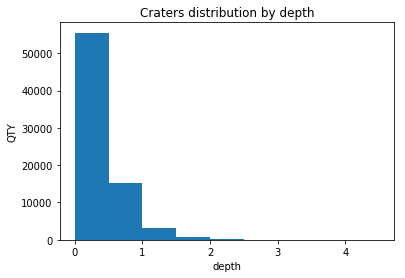

In [161]:
bins =  [0, 1, 2, 3, 4, 5]
bins = np.arange(0, 5, .5)
plt.hist(data['DEPTH_RIMFLOOR_TOPOG'], bins)
plt.xlabel('depth')
plt.ylabel('QTY')
plt.title('Craters distribution by depth')

plt.show()

In [162]:
groups = data.DEPTH_RIMFLOOR_TOPOG.groupby(pd.cut(data.DEPTH_RIMFLOOR_TOPOG, bins), sort=True)

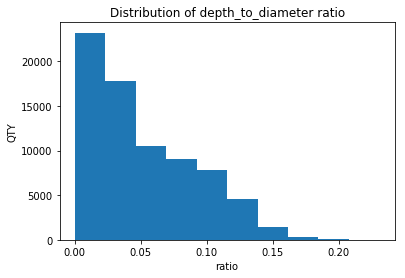

In [163]:
plt.hist(data['DEPTH_DIAM_RATIO'], bins=10)

plt.xlabel('ratio')
plt.ylabel('QTY')
plt.title('Distribution of depth_to_diameter ratio')

plt.show()

In [164]:
groups = data.DEPTH_DIAM_RATIO.groupby(pd.cut(data.DEPTH_DIAM_RATIO, bins=np.arange(0, 0.3, 0.05)), sort=True)

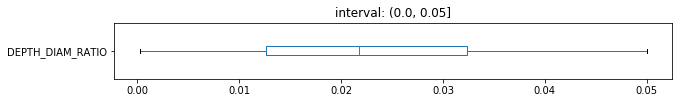

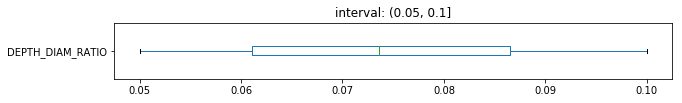

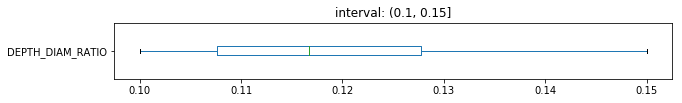

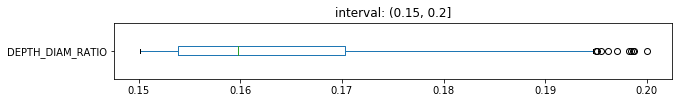

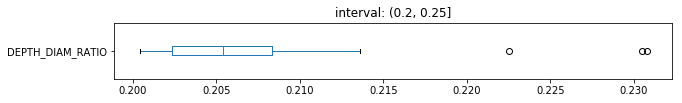

In [165]:
plt.figure(1)
i = 1
for gr_name in groups.groups:
    plt.subplot(5, 1, i)
    title = 'interval: ' + str(gr_name)
    groups.get_group(gr_name).plot.box(figsize=(10,6), vert=False, title=title )
    plt.show()
    i += 1


### Two-variables graphs 

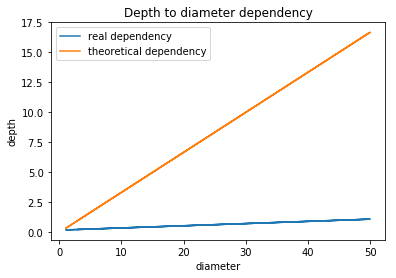

In [166]:
# find polynomials coefficients and plot dependancies graph
coef = np.polyfit(data['DIAM_CIRCLE_IMAGE'], data['DEPTH_RIMFLOOR_TOPOG'], deg=1)
plt.plot(data['DIAM_CIRCLE_IMAGE'], coef[0] * data['DIAM_CIRCLE_IMAGE'] + coef[1], 
         '-', label='real dependency' )

plt.plot(data['DIAM_CIRCLE_IMAGE'],data['DIAM_CIRCLE_IMAGE']/3.,'-', label='theoretical dependency')

plt.legend(loc=0)
plt.xlabel('diameter')
plt.ylabel('depth')
plt.title('Depth to diameter dependency')

plt.show()

Plot above shows that real dependency has positive slope , but less then theoretical. It's explains by additional factors: surface erosion and soil density, but confirms our assume about correlation between diameter and depth

In [167]:
ratio_range = {(0, .05):'brown', (.5, .1):'burlywood', (.1, .15):'olive', (.15, .2):'orange', (.2, .25): 'yellow'}
print(ratio_range)

def set_color(ratio):
    for r in ratio_range:
        if r[0] < ratio <= r[1]:
            return ratio_range[r]    
    return 'white'
    
data['color'] = data.DEPTH_DIAM_RATIO.map(lambda x: set_color(x))

{(0, 0.05): 'brown', (0.5, 0.1): 'burlywood', (0.1, 0.15): 'olive', (0.15, 0.2): 'orange', (0.2, 0.25): 'yellow'}


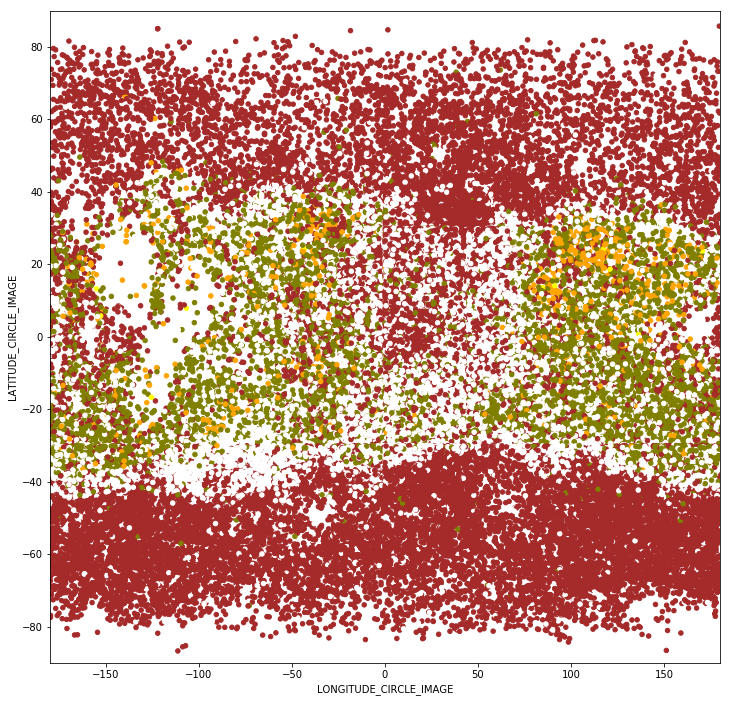

In [168]:
data.plot.scatter(x='LONGITUDE_CIRCLE_IMAGE', y='LATITUDE_CIRCLE_IMAGE', c=data.color, figsize=(12, 12))
plt.axis([-180,180,-90,90])
plt.show()

scatter plot demonstrates craters distribution on the surface and shows that craters with less diam_to_depth ratio concentrate near poles where soil is more solid